<a href="https://colab.research.google.com/github/cmack02/DSC205Final/blob/main/win_share_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pandas as pd
df0= stats_2021 = pd.read_csv('2021.csv')
df = stats_2022 = pd.read_csv('2022.csv')

stats_2021 = stats_2021[['Player', 'Pos_x','G_x','MP_x','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']]
stats_2022 = stats_2022[['Player', 'Pos_x','G_x','MP_x','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']]

stats_2021.columns = ['Player', 'Pos','G','MP','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']
stats_2022.columns = ['Player', 'Pos','G','MP','PS/G','AST','TRB','3P%','FG%','FT%','eFG%','VORP','TS%','BPM','PER','WS']


ws_2022 = stats_2022[['Player', 'WS']]

<function matplotlib.pyplot.savefig(*args, **kwargs)>

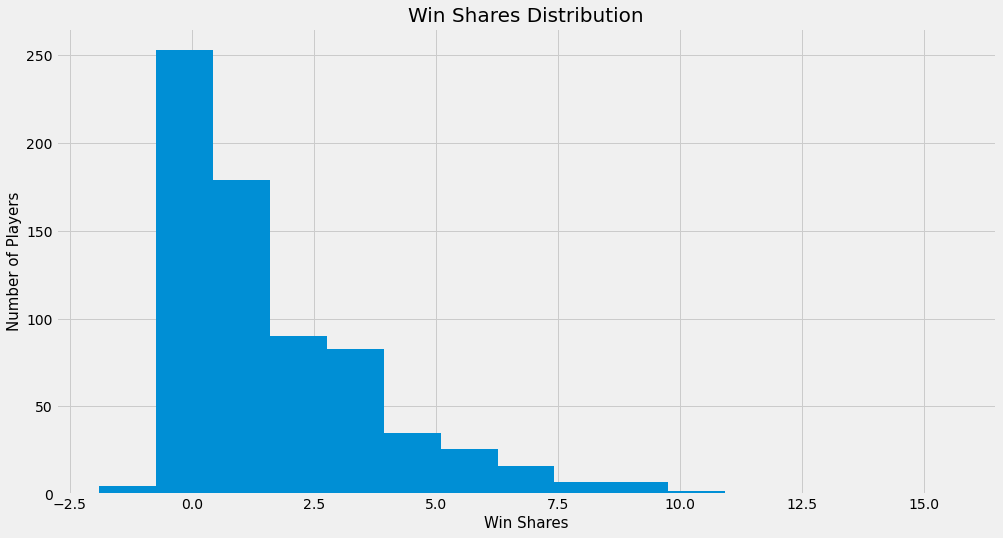

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.hist(stats_2021['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);
plt.savefig

<function matplotlib.pyplot.savefig(*args, **kwargs)>

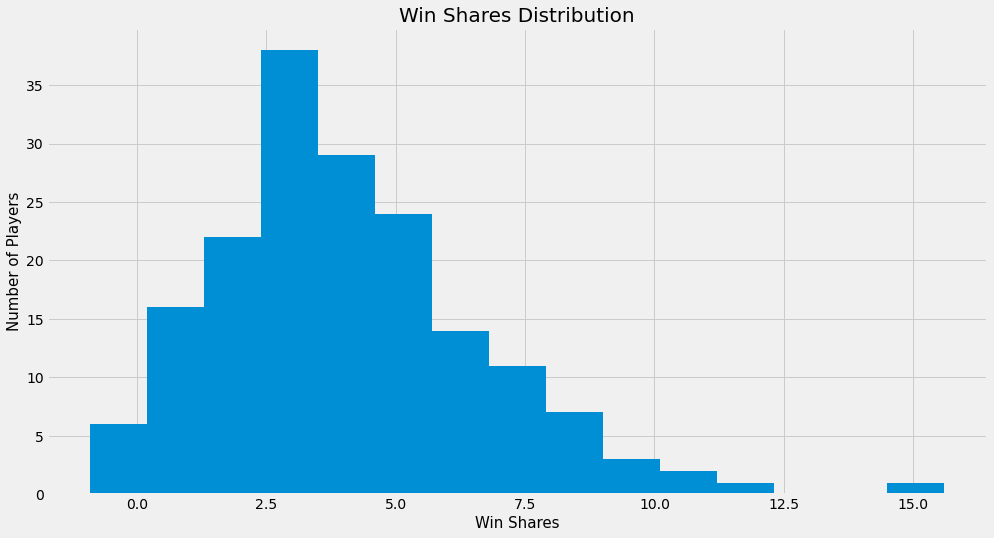

In [ ]:
stats_2021 = stats_2021[stats_2021['G'] > 30]
stats_2022 = stats_2022[stats_2022['G'] > 30]

stats_2021 = stats_2021[stats_2021['MP'] > 25]
stats_2022 = stats_2022[stats_2022['MP'] > 25]

plt.figure(figsize = (15,8))
plt.hist(stats_2021['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);
plt.savefig

In [ ]:
corr_2021 = stats_2021.corr()['WS'].reset_index()
corr_2021 = corr_2021.sort_values([('WS')], ascending = False)
corr_2021

,index,WS
13,WS,1.000000
9,VORP,0.897558
11,BPM,0.835594
12,PER,0.787570
10,TS%,0.740994
6,FG%,0.639545
8,eFG%,0.614691
4,TRB,0.504184
2,PS/G,0.500177
1,MP,0.436604


In [ ]:
train, test = train_test_split(stats_2021, test_size=0.25, random_state=99)

x_train = train[['PS/G','TS%','TRB','VORP','PER','MP']]
y_train = train[['WS']]

x_test = test[['PS/G','TS%','TRB','VORP','PER','MP']]
y_test = test[['WS']]


In [ ]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

linReg.predict(x_test)

y_lin_pred = linReg.predict(x_test)

print('Score: %.3f' % linReg.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_lin_pred))
print('Variance score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.895
Mean squared error: 0.876
Mean Absolute error: 0.758
Variance score: 0.866


In [ ]:
svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(x_train, y_train.values.ravel())

y_svr_pred = svr.predict(x_test)

print('Score: %.3f' % svr.score(x_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_svr_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_svr_pred))
print('Variance score: %.3f' % r2_score(y_test, y_svr_pred))


Score: 0.895
Mean squared error: 1.056
Mean Absolute error: 0.854
Variance score: 0.838


In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(x_train, y_train)

y_knn = knn.predict(x_test)

print('Score: %.3f' % knn.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_knn))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_knn))
print('Variance Score: %.3f' % r2_score(y_test, y_knn))

Score: 0.641
Mean Squared Error: 1.999
Mean Absolute error: 1.153
Variance Score: 0.694


In [ ]:
lin_new = stats_2022[['PS/G','TS%','TRB','VORP','PER','MP']]

lin_pred_2022 = linReg.predict(lin_new)

lin_names = stats_2022.iloc[:, 0]
a = []
for i, j in zip(lin_pred_2022, lin_names):
    a.append({'WS_pred':i,'Player':j})

lin_wins = pd.DataFrame(a)
lin_wins['WS_pred'] = round(lin_wins['WS_pred'].astype(float),2)

lin_wins = lin_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
lin_wins = lin_wins.merge(ws_2022, on = 'Player', how = 'inner')


pos = np.arange(len(lin_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, lin_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, lin_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = lin_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2023 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Linear Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

ValueError: ignored

In [ ]:
svr_new = stats_2022[['PS/G','TS%','TRB','VORP','PER','MP']]

svr_pred_2022 = svr.predict(svr_new)

svr_names = stats_2022.iloc[:, 0]

b = []
for i, j in zip(svr_pred_2022, svr_names):
    b.append({'WS_pred':i,'Player':j})


svr_wins = pd.DataFrame(b)
svr_wins['WS_pred'] = round(svr_wins['WS_pred'].astype(float),2)

svr_wins = svr_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
svr_wins = svr_wins.merge(ws_2022, on = 'Player', how = 'inner')

pos = np.arange(len(svr_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, svr_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + 0.4, svr_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3,label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = svr_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2023 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Win shares are predicted with Support Vector Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

ValueError: ignored

In [ ]:
knn_new = stats_2022[['PS/G','TS%','TRB','VORP','PER','MP']]

knn_pred_2022 = knn.predict(svr_new)

knn_names = stats_2022.iloc[:, 0]

c = []
for i, j in zip(knn_pred_2022, knn_names):
    c.append({'WS_pred':i,'Player':j})


knn_wins = pd.DataFrame(c)
knn_wins['WS_pred'] = round(knn_wins['WS_pred'].astype(float),2)

knn_wins = knn_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
knn_wins = knn_wins.merge(ws_2022, on = 'Player', how = 'inner')


pos = np.arange(len(knn_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, knn_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + 0.4, knn_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3,label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = knn_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2023 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with k-Nearest Neighbors Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

ValueError: ignored

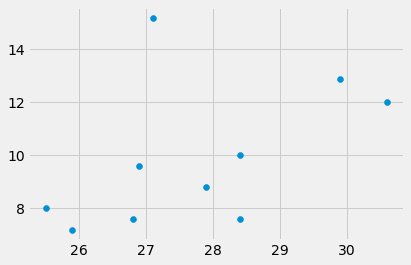

In [16]:
import matplotlib.pyplot as plt

PPG = [30.6, 29.9, 28.4, 28.4, 27.9, 27.1, 26.9, 26.8, 25.9, 25.5]
WS = [12.0, 12.9, 7.6, 10.0, 8.8, 15.2, 9.6, 7.6, 7.2, 8.0]

plt.scatter(PPG, WS)
plt.show()
